In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pylab
import warnings
warnings.filterwarnings('ignore')

In [359]:
df=pd.read_csv(r"C:\Users\admin\Documents\Data Science\Assignment\Logistic Regression\bank-full.csv",delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [360]:
df.shape

(45211, 17)

In [361]:
#plt.rcParams['figure.dpi']=250
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- All the columns data types are correctly identified

In [363]:
df.duplicated().sum()

0

# Data Analysis

##### In Data Analysis we will analyze data to find out the below stuff
- Missing values
- All the Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationshop between independent and dependent feature (Target)

#### 1. Missing values

In [364]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 ^Observations: no null values(missing values) are presents.

In [365]:
df.rename(columns={'y':'deposit'}, inplace=True)

In [366]:
#Find features with one value
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


No feature with only one unique value

#### 2. All the Numerical Variables

In [367]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical Features:',len(numerical_features), '\n', numerical_features)
df[numerical_features].head()

Number of numerical Features: 7 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [368]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
df[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [369]:
for feature in categorical_features:
    print('The feature is {} and number of catagories are {}.'.format(feature, df[feature].nunique()))

The feature is job and number of catagories are 12.
The feature is marital and number of catagories are 3.
The feature is education and number of catagories are 4.
The feature is default and number of catagories are 2.
The feature is housing and number of catagories are 2.
The feature is loan and number of catagories are 2.
The feature is contact and number of catagories are 3.
The feature is month and number of catagories are 12.
The feature is poutcome and number of catagories are 4.
The feature is deposit and number of catagories are 2.


- feature job and month has highest catagories

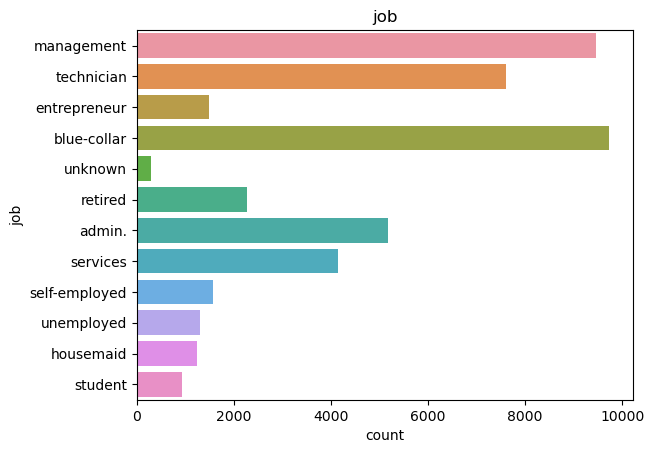

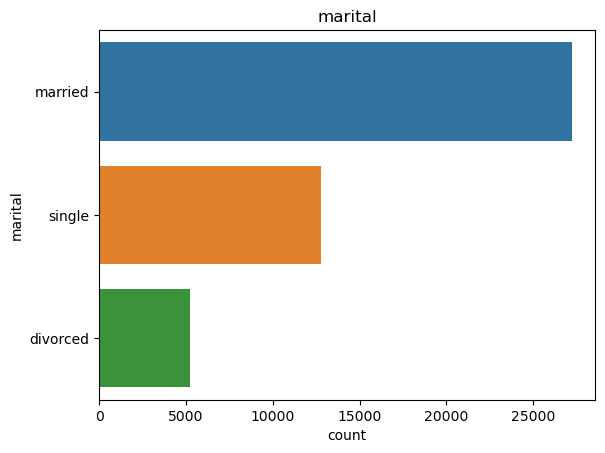

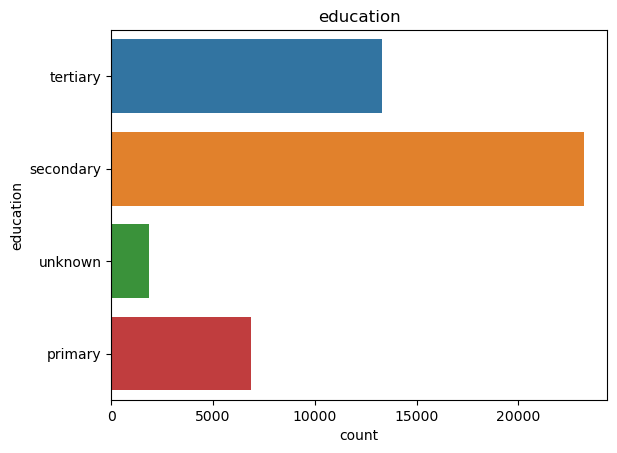

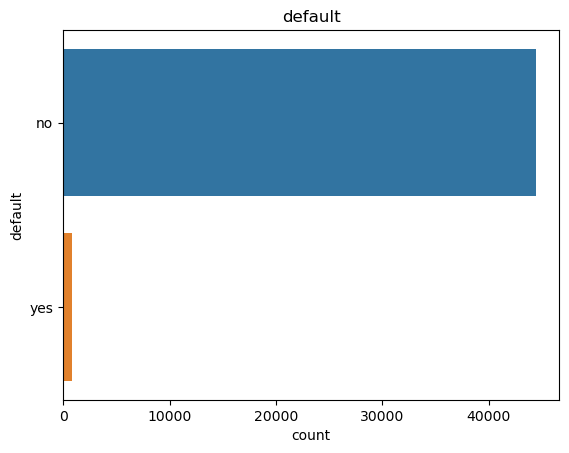

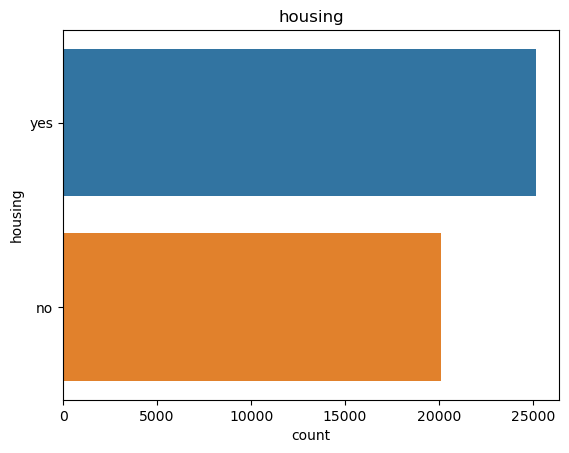

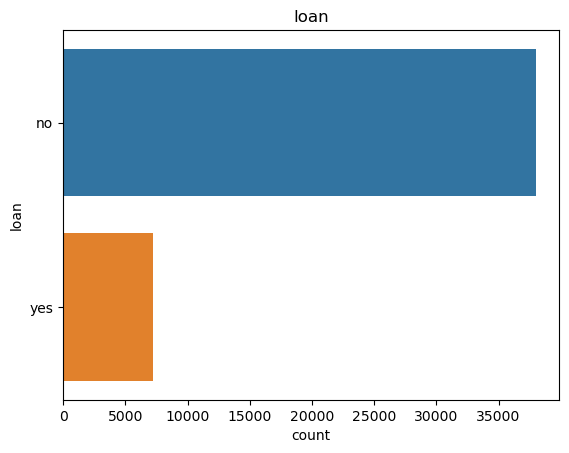

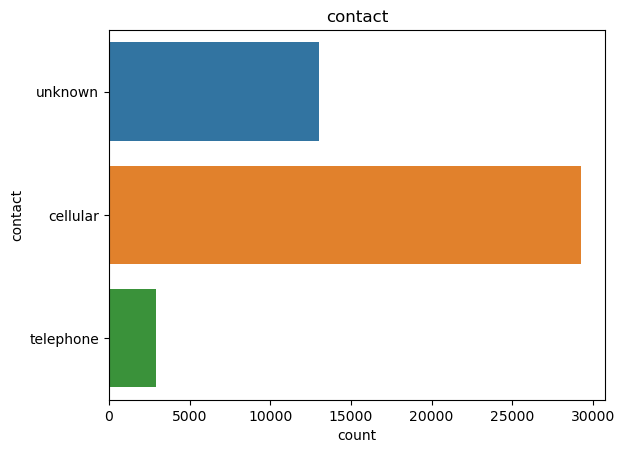

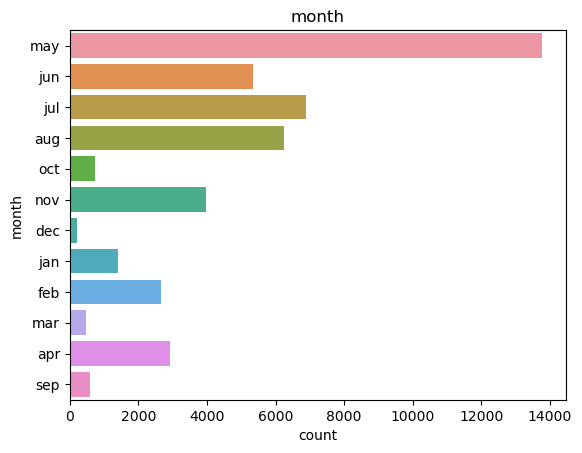

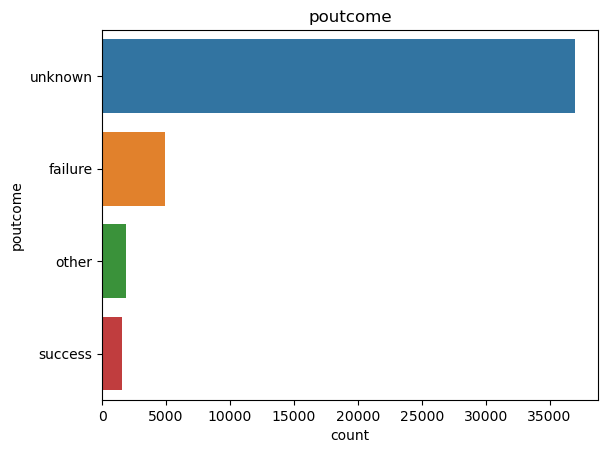

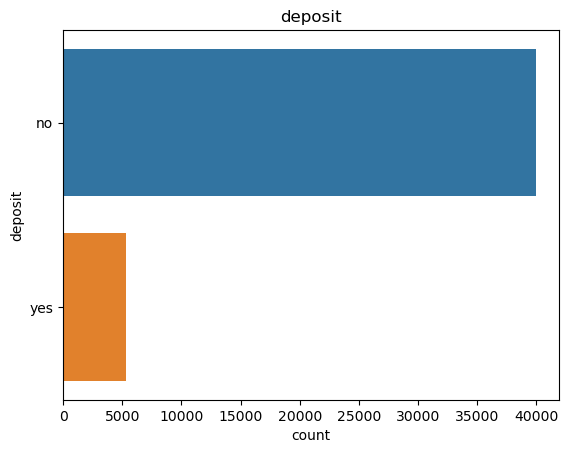

In [370]:
# Find catagorical feature distribution:
for feature in categorical_features:
    data=df.copy()
    sns.countplot(y=df[feature])
    plt.xlabel('count')
    plt.title(feature)
    plt.show()

- clients with job in management and blue coller are high in record and student and housemaid are less in record
- clients with married record are high and divorced are less
- client of education backgroud of secondary are high in records.
- data in month of may is high and less in dec.

#### Relation between catagorical feature and dependent variable(target column)

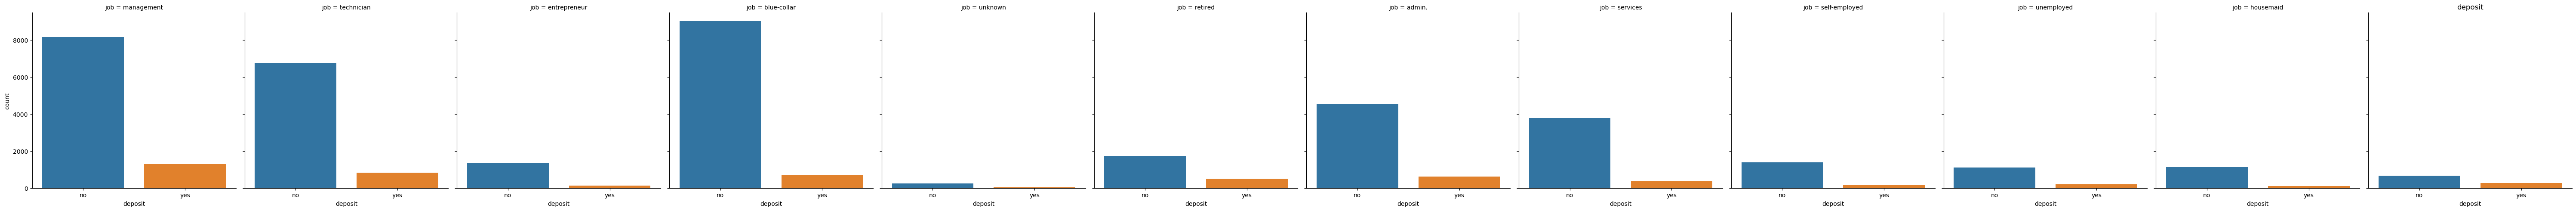

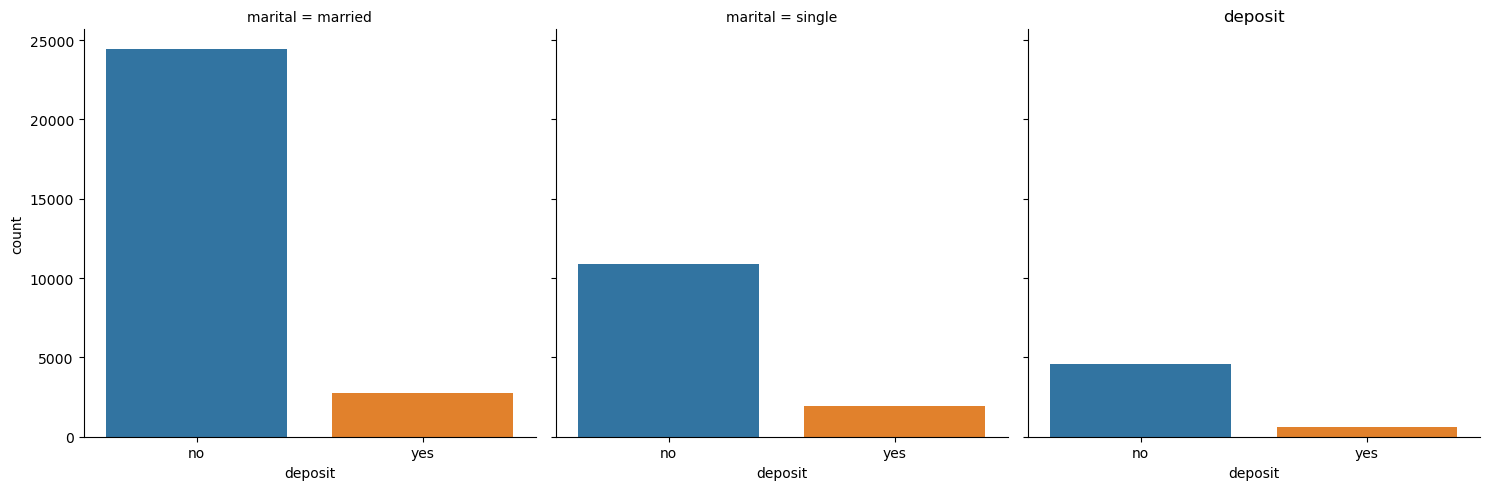

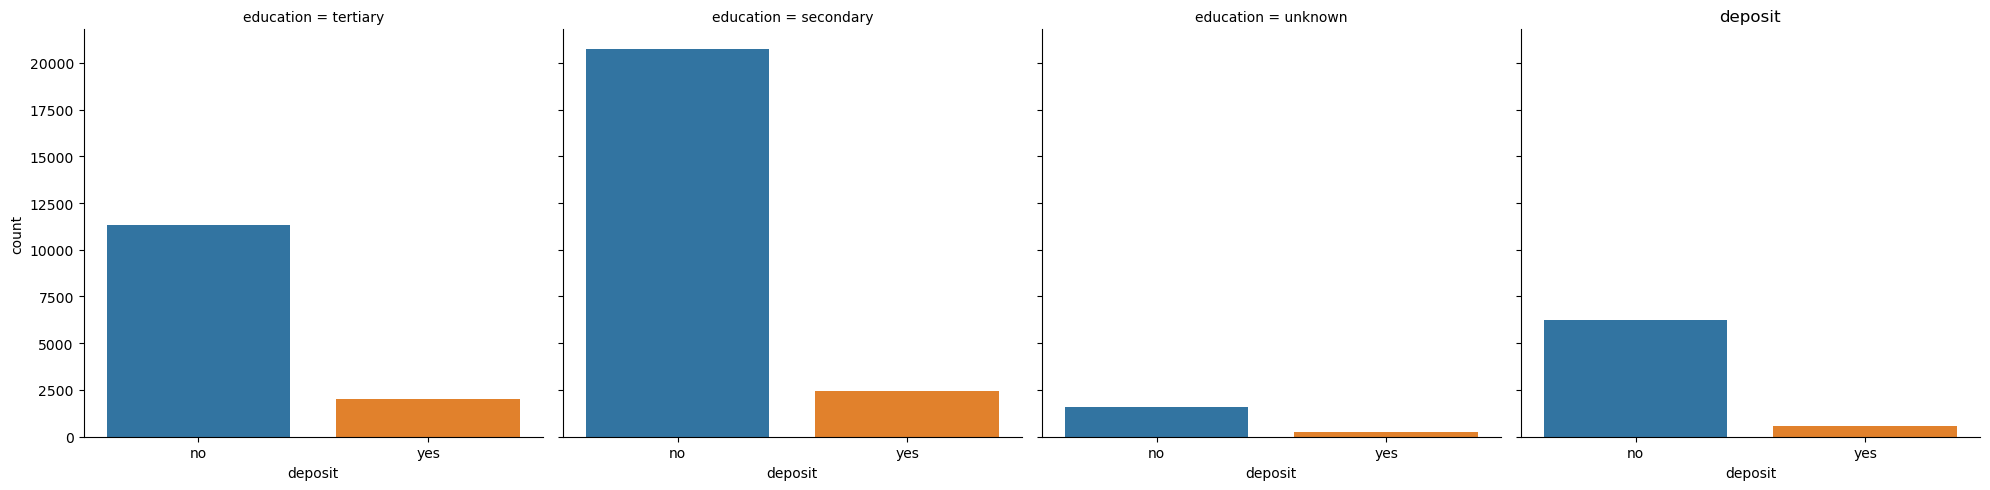

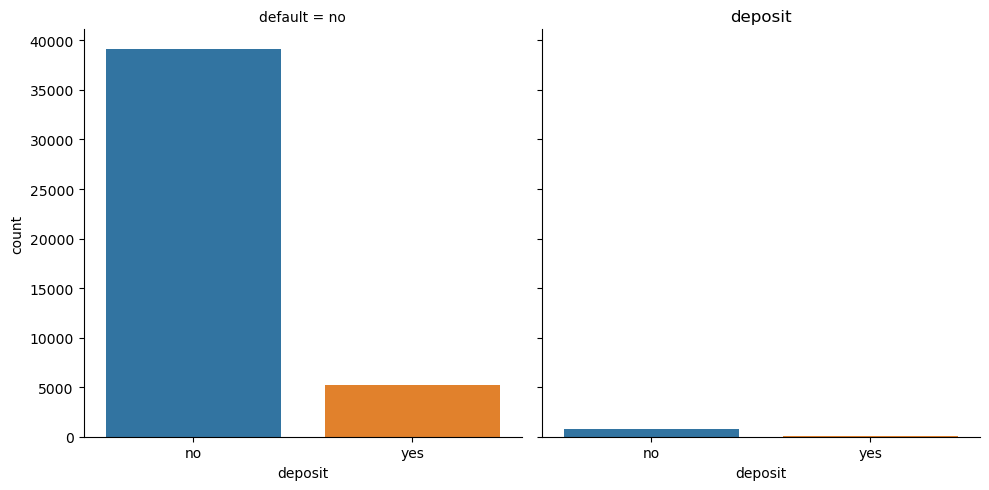

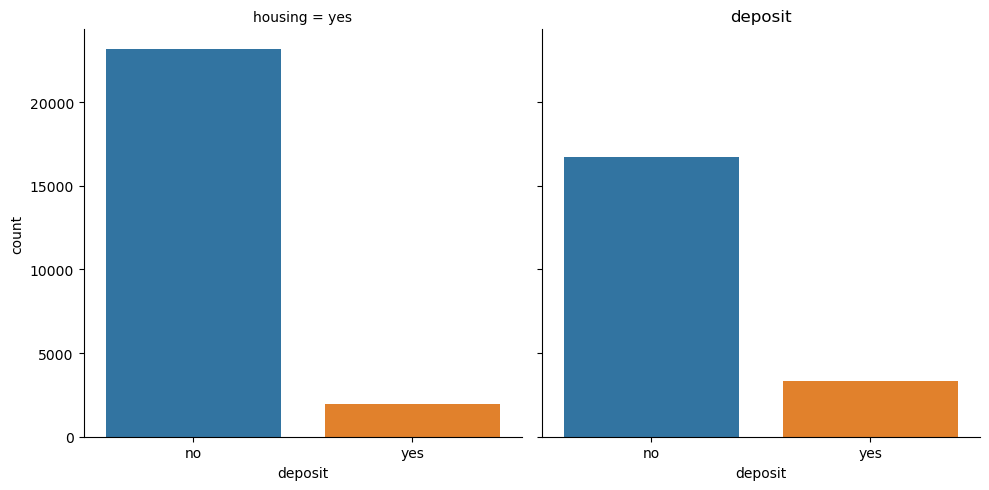

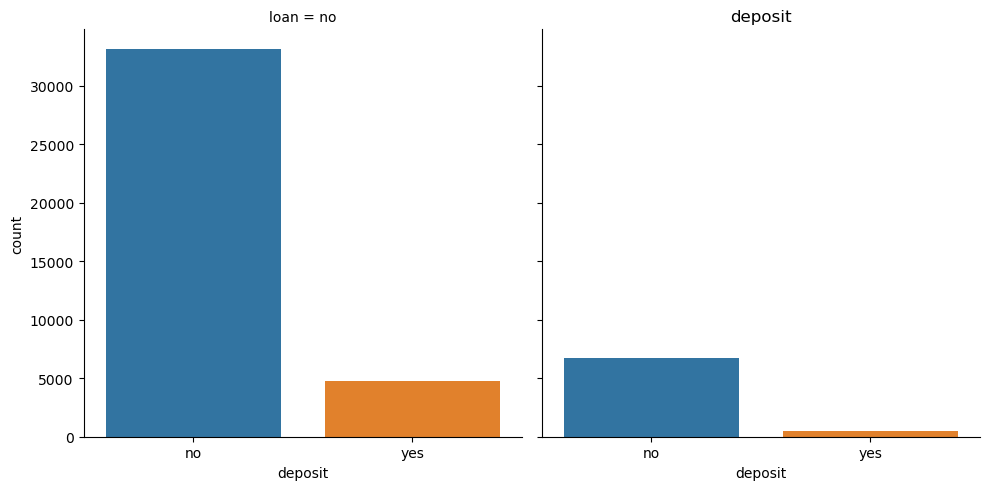

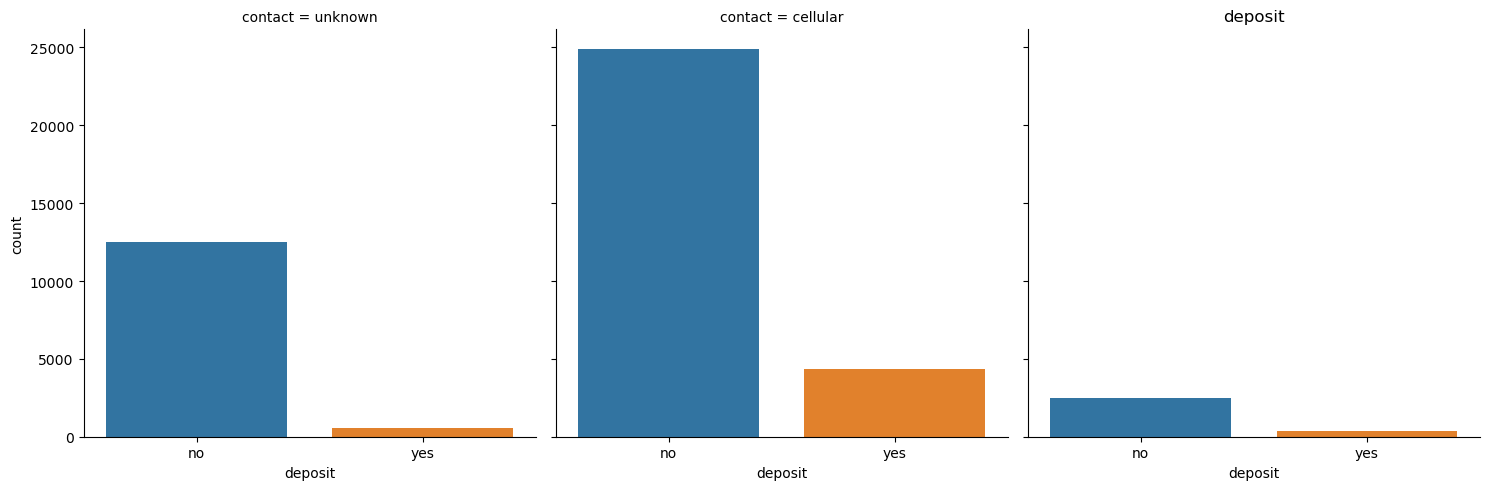

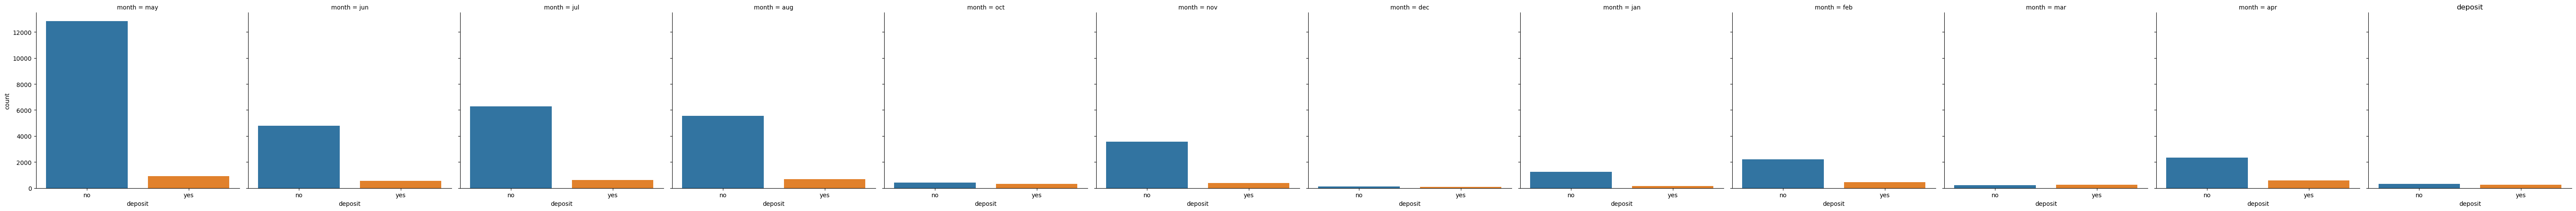

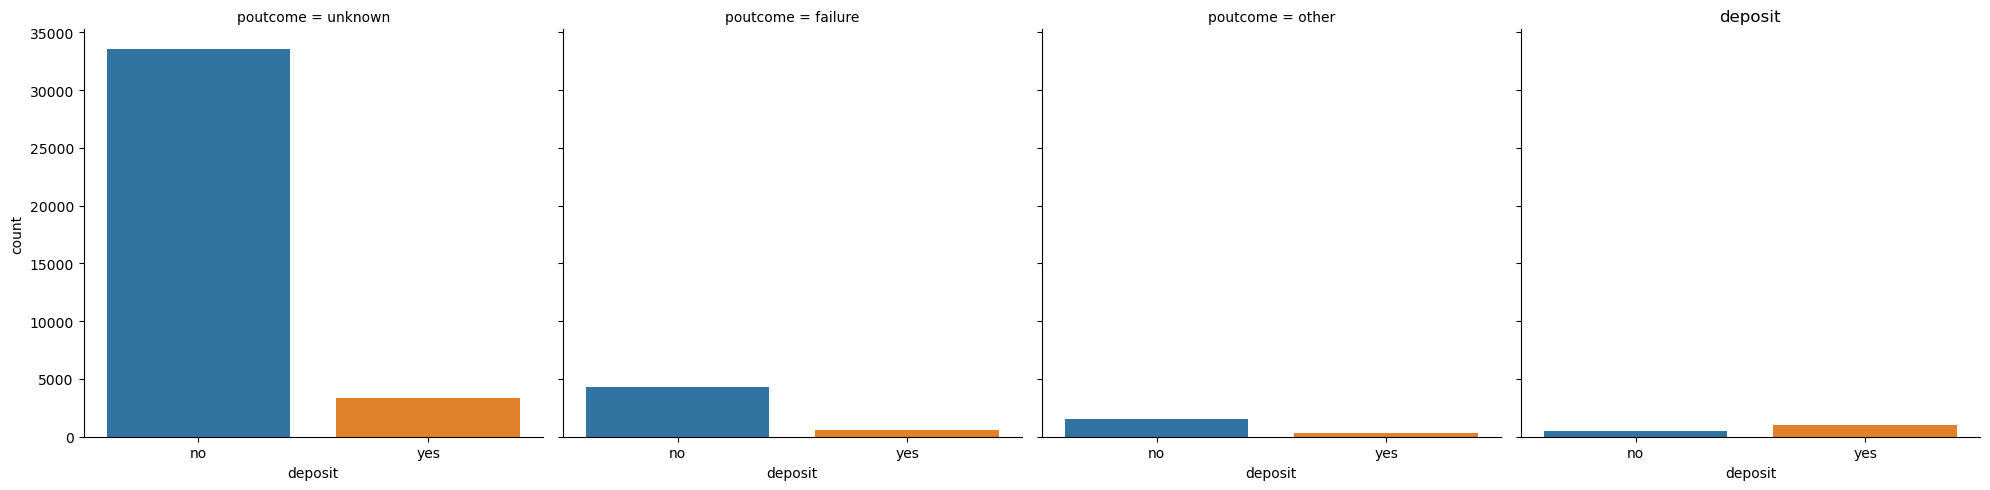

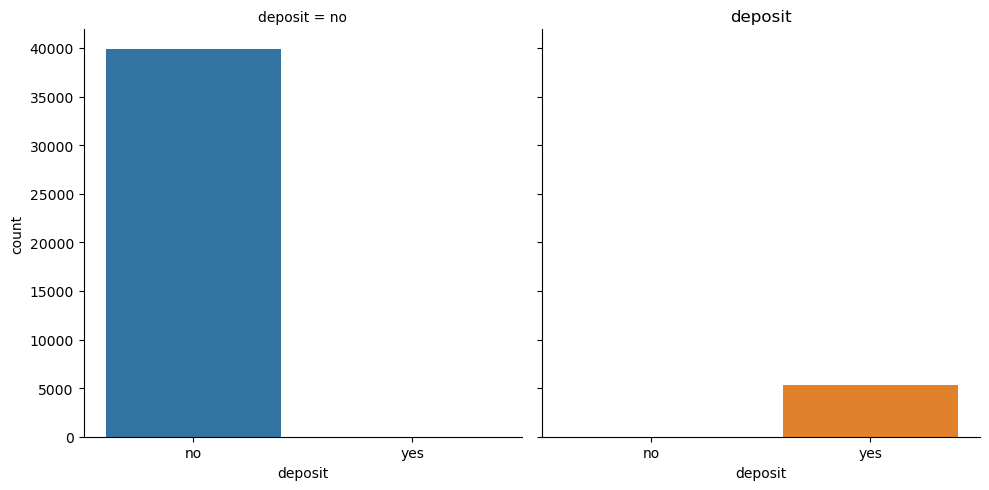

In [371]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature,kind='count', data=data)
    plt.title(feature)
    plt.show()

In [372]:
for categorical_feature in categorical_features:
    print(data.groupby(['deposit', categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

In [373]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print('discrete_feature:', (len(discrete_feature)))

discrete_feature: 0


In [374]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('continuous_feature:', (len(continuous_feature)), '\n',continuous_feature)
df[continuous_feature].head()

continuous_feature: 7 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#### 3. Distribution of the Numerical Variables

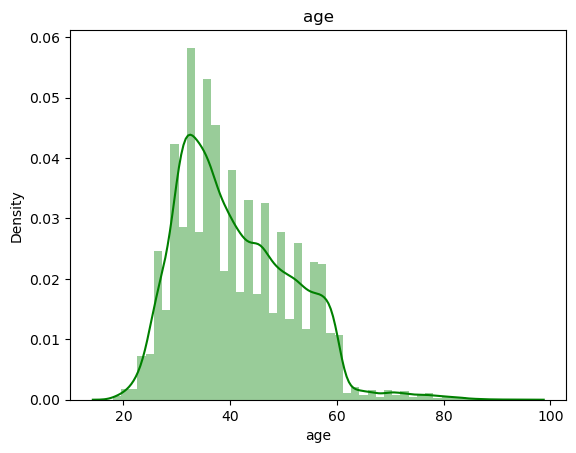

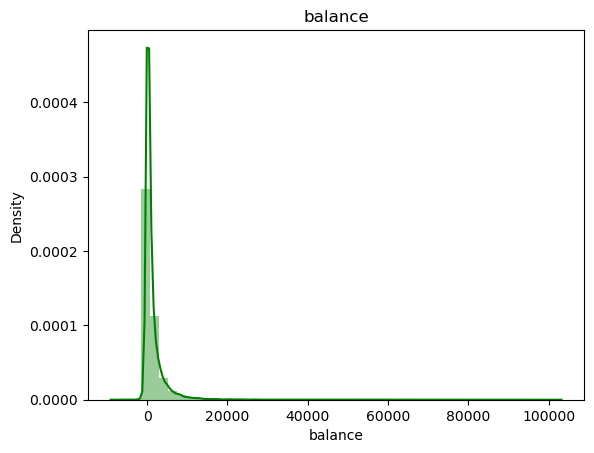

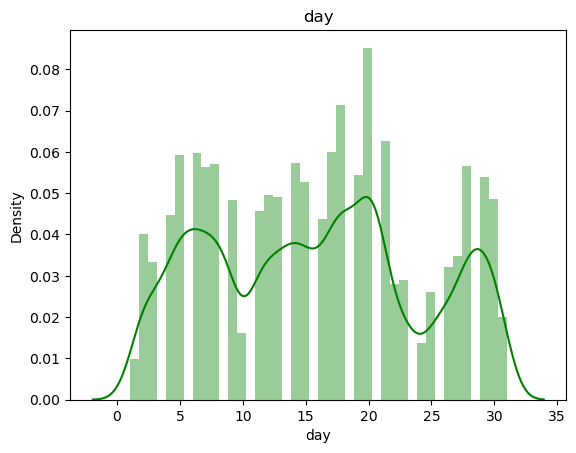

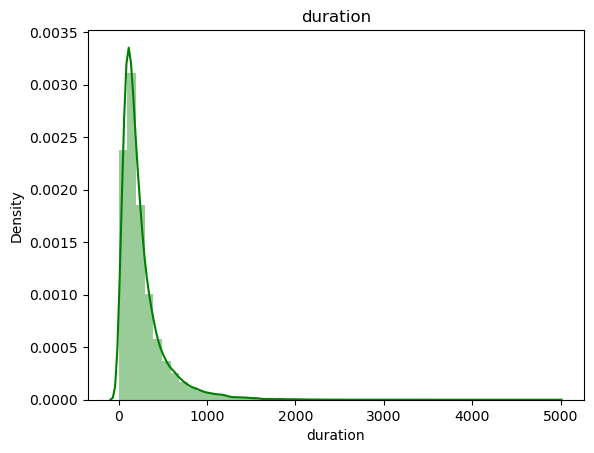

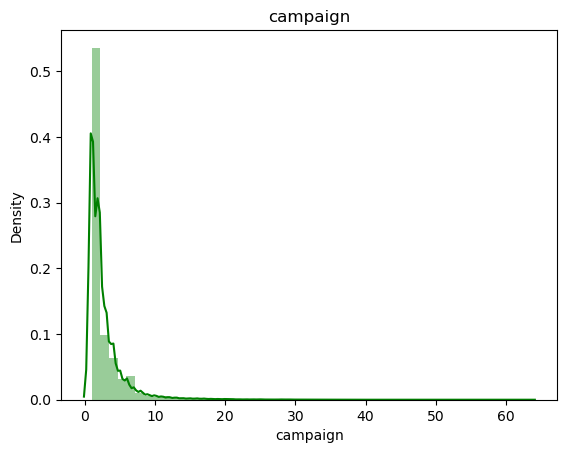

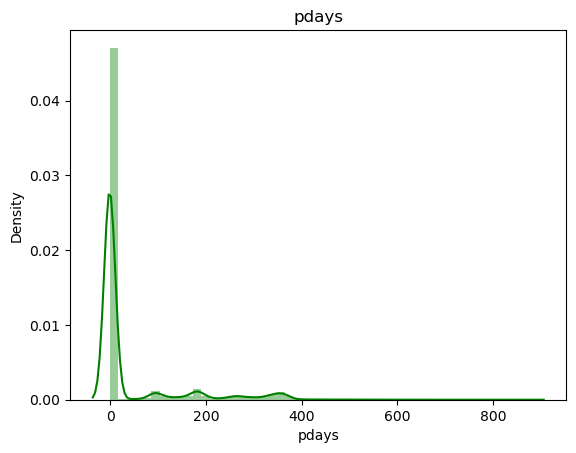

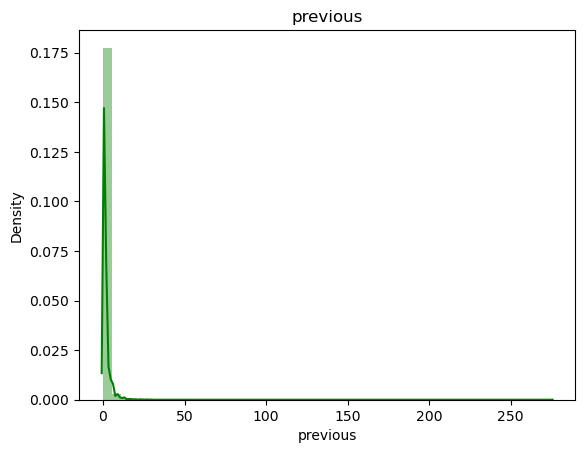

In [375]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(data[feature], color='green')
    plt.title(feature)
    plt.show()

#### Outliers Detection

In [376]:
df[continuous_feature].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


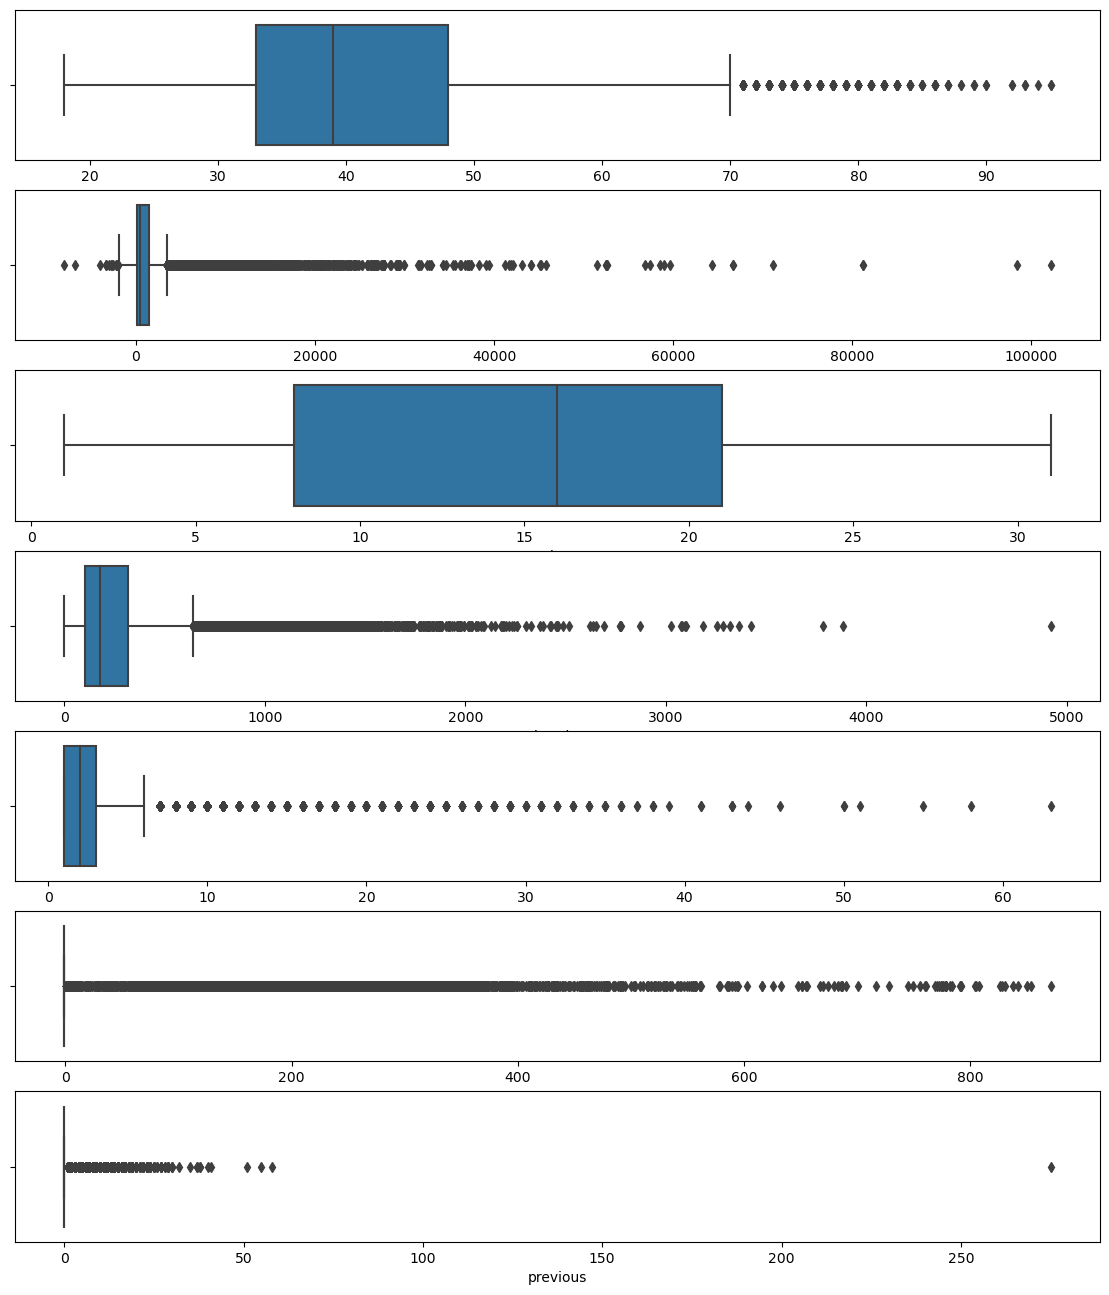

<Figure size 640x480 with 0 Axes>

In [377]:
od_df=df.copy()
fig, axes=plt.subplots(7,1, figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='age', data=od_df, ax=axes[0])
sns.boxplot(x='balance', data=od_df, ax=axes[1])
sns.boxplot(x='day', data=od_df, ax=axes[2])
sns.boxplot(x='duration', data=od_df, ax=axes[3])
sns.boxplot(x='campaign', data=od_df, ax=axes[4])
sns.boxplot(x='pdays', data=od_df, ax=axes[5])
sns.boxplot(x='previous', data=od_df, ax=axes[6])
plt.show()
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

### After Log-Transformation

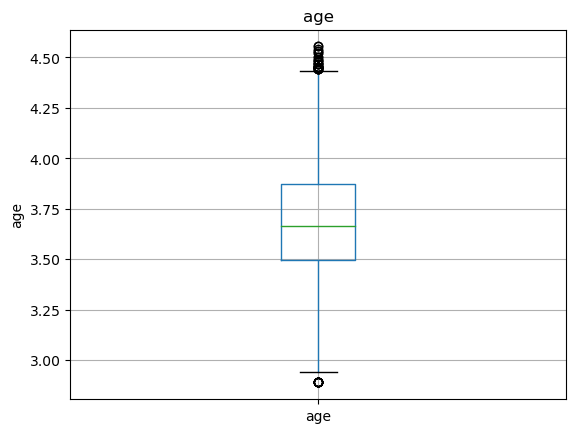

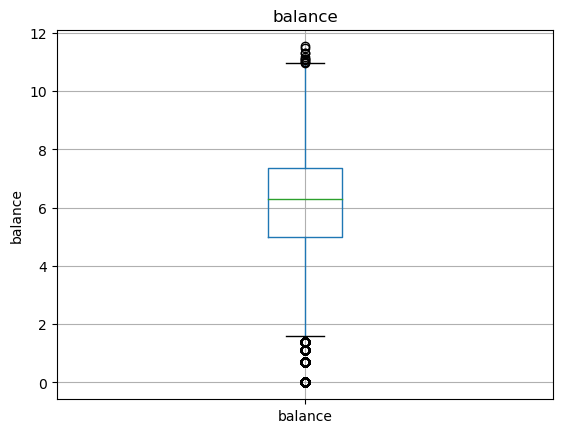

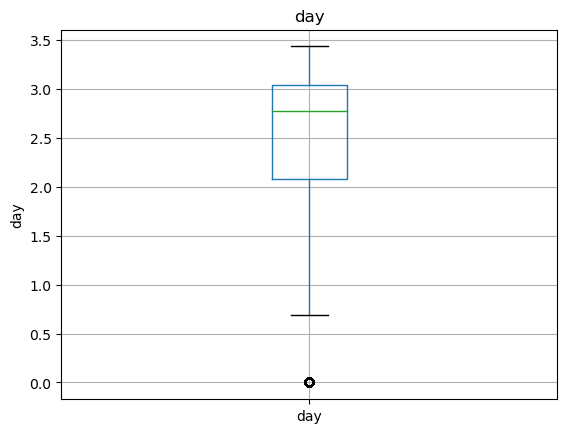

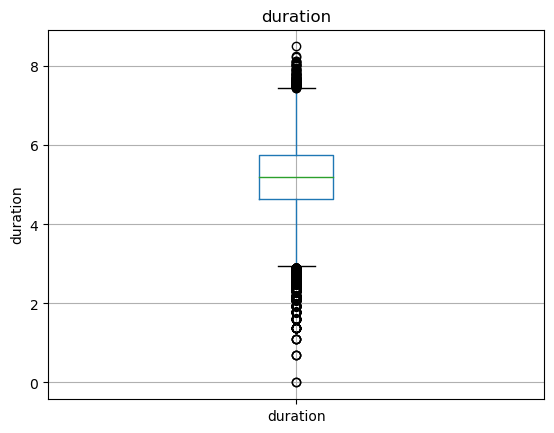

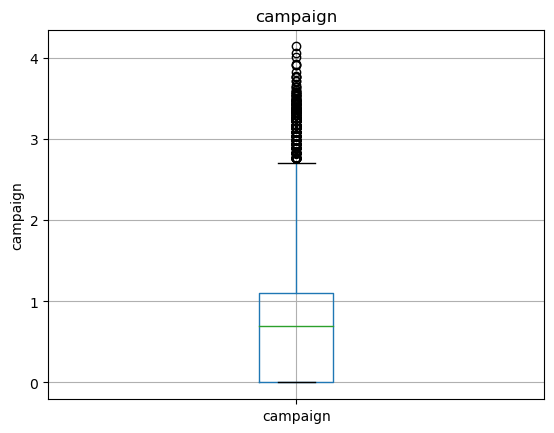

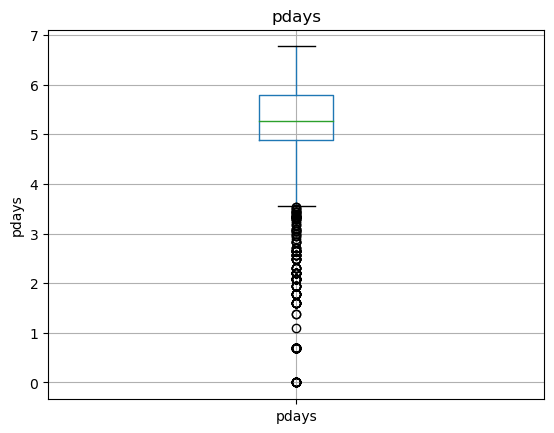

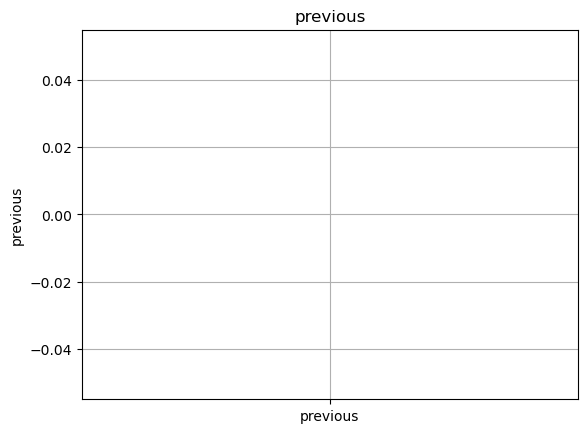

In [378]:
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

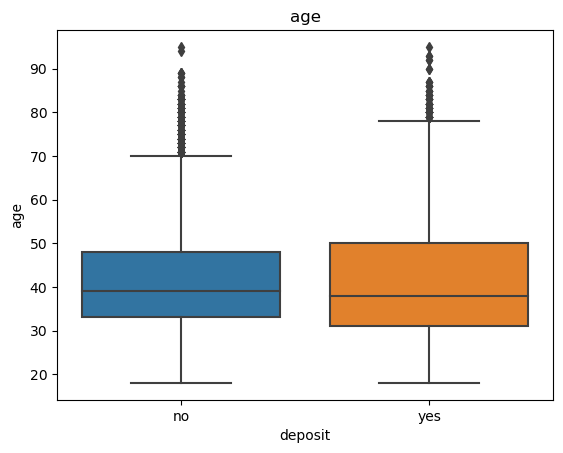

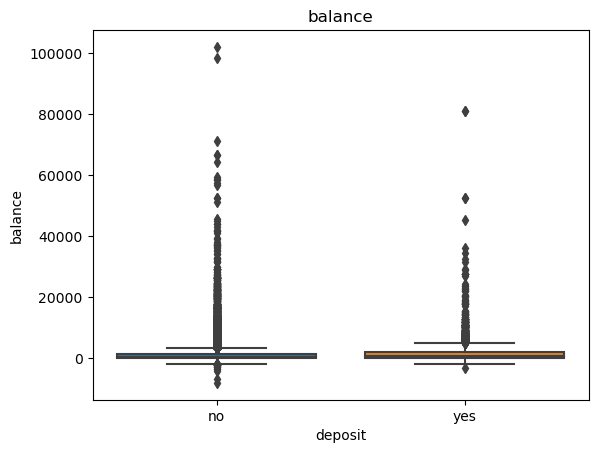

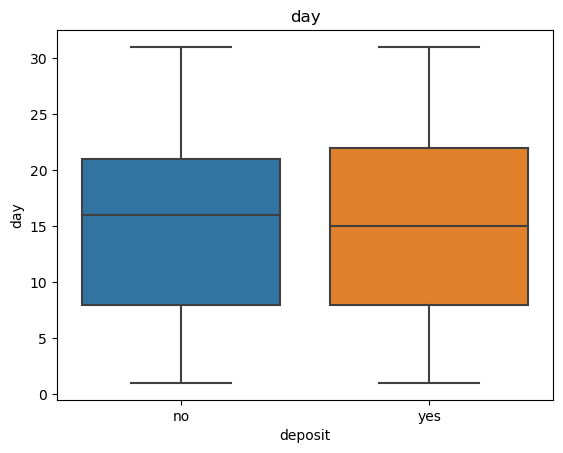

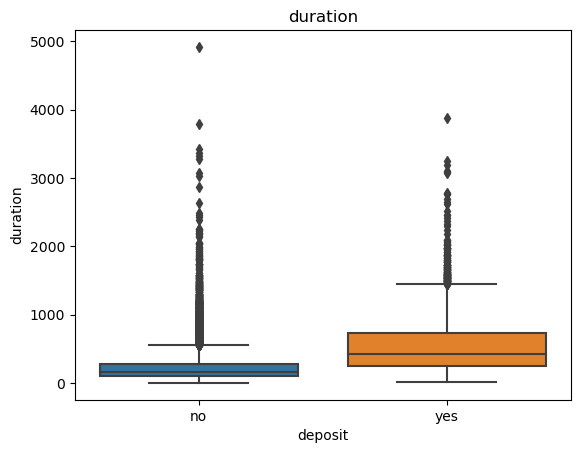

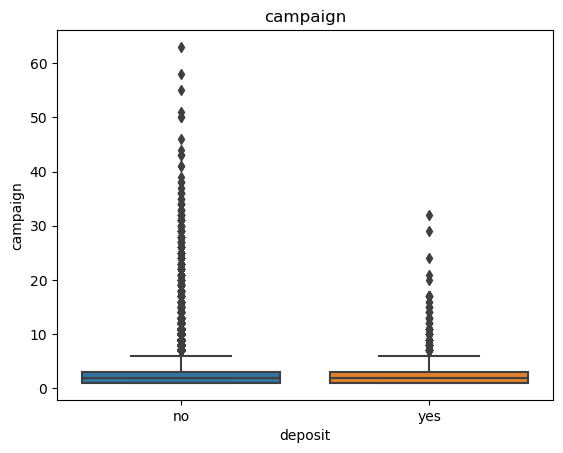

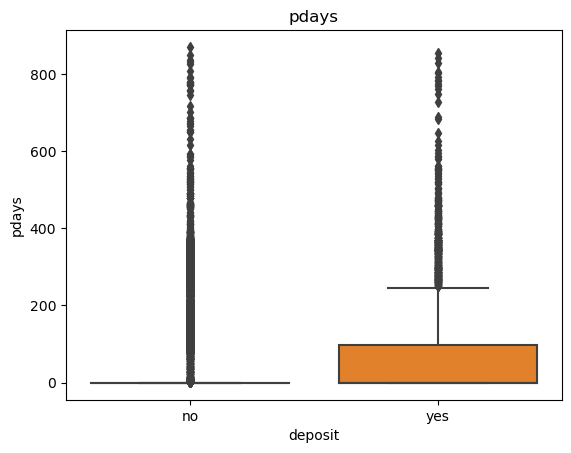

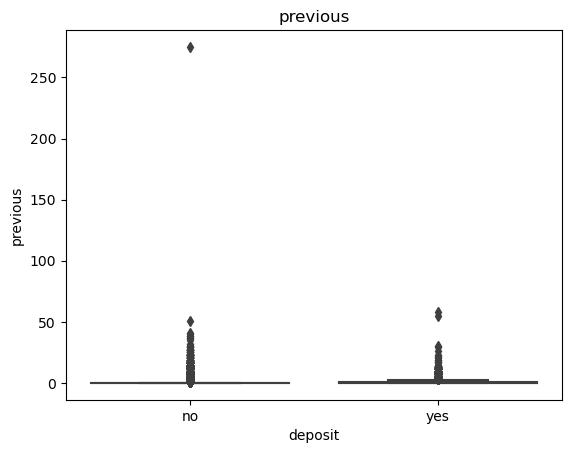

In [379]:
#Relation between continuous numerical feature and target variable:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(x='deposit', y=data[feature],data=data)
    plt.title(feature)
    plt.show()

- having age between 30-50 has shown more interest in deposit term.
- having high duration shown more interest in deposit term.

<AxesSubplot:>

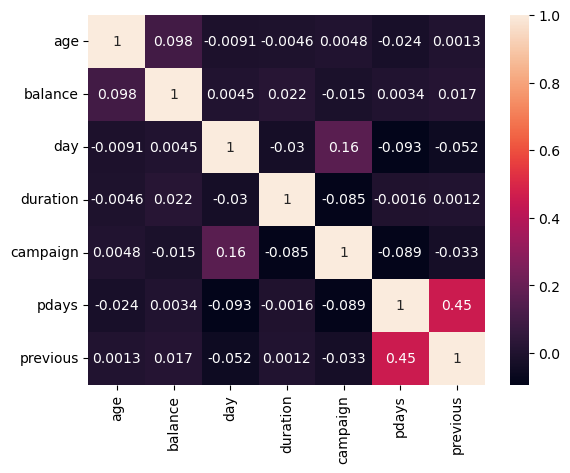

In [380]:
#Correlation between numerical features
sns.heatmap(df.corr(),annot=True)

- all numerical features are not correlated with each other.

<AxesSubplot:xlabel='deposit', ylabel='count'>

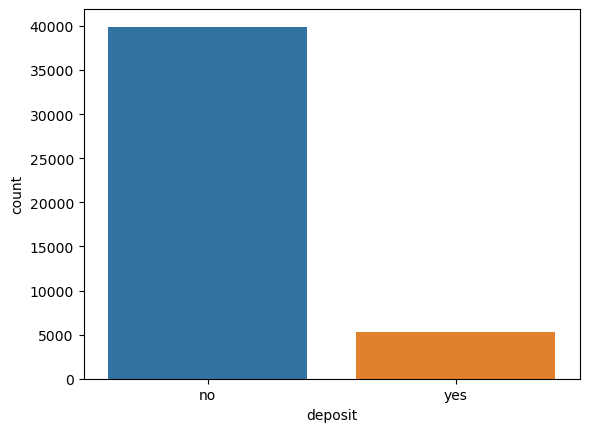

In [381]:
#Check dataset is balance or not based on targert column:
sns.countplot(x='deposit',data=df)

- dataset is not balanced based on targert variable.

In [382]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

# Feature Engineering

- drop unwanted features
- Handle Missing Values
- Handle catagorical feature
- handle feature scaling

In [383]:
df2=df.copy()

In [384]:
df2.shape

(45211, 17)

In [385]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [386]:
#Default column is not needed so we will drop it.
df2.drop(['default'],axis=1, inplace=True)
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [387]:
df2.groupby(['pdays', 'deposit']).size()

pdays  deposit
-1     no         33570
       yes         3384
 1     no             9
       yes            6
 2     no            35
                  ...  
 838   no             1
 842   yes            1
 850   no             1
 854   yes            1
 871   no             1
Length: 914, dtype: int64

- 80% values in pdays of -1 are present which is not in use of in model building so will drop it.

In [388]:
df2.drop(['pdays'], axis=1, inplace=True)

In [389]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,0,unknown,no


In [390]:
def fn(x):
    df2[x]=df2[x].replace('unknown', 0)

In [391]:
fn('job')
fn('education')
fn('contact')
fn('poutcome')

In [392]:
df2['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: job, dtype: int64

In [393]:
def fn(y):
    df2[y]=df2[y].replace('blue-collar',1)
    df2[y]=df2[y].replace('management',2)
    df2[y]=df2[y].replace('technician',3)
    df2[y]=df2[y].replace('admin.',4)
    df2[y]=df2[y].replace('services',5)
    df2[y]=df2[y].replace('retired',6)
    df2[y]=df2[y].replace('self-employed',7)
    df2[y]=df2[y].replace('entrepreneur',8)
    df2[y]=df2[y].replace('unemployed',9)
    df2[y]=df2[y].replace('housemaid',10)
    df2[y]=df2[y].replace('student',11)

In [394]:
fn('job')

In [395]:
df2['job'].value_counts()

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [396]:
df2['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [397]:
def fn(i):
    df2[i]=df2[i].replace('married', 1)
    df2[i]=df2[i].replace('single', 2)
    df2[i]=df2[i].replace('divorced', 3)

In [398]:
fn('marital')

In [399]:
df2['marital'].value_counts()

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [400]:
df2['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
0             1857
Name: education, dtype: int64

In [401]:
def fn(a):
    df2[a]=df2[a].replace('primary',1)
    df2[a]=df2[a].replace('secondary',2)
    df2[a]=df2[a].replace('tertiary',3)

In [402]:
fn('education')

In [403]:
df2['education'].value_counts()

2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64

In [404]:
df2['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [405]:
def fn(b):
    df2[b]=df2[b].replace('yes',1)
    df2[b]=df2[b].replace('no',2)

In [406]:
fn('housing')

In [407]:
df2['housing'].value_counts()

1    25130
2    20081
Name: housing, dtype: int64

In [408]:
df2['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [409]:
def fn(c):
    df2[c]=df2[c].replace('yes',1)
    df2[c]=df2[c].replace('no',2)

In [410]:
fn('loan')

In [411]:
df2['loan'].value_counts()

2    37967
1     7244
Name: loan, dtype: int64

In [412]:
df2['contact'].value_counts()

cellular     29285
0            13020
telephone     2906
Name: contact, dtype: int64

In [413]:
def fn(d):
    df2[d]=df2[d].replace('cellular',1)
    df2[d]=df2[d].replace('telephone',2)

In [414]:
fn('contact')

In [415]:
df2['contact'].value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [416]:
df2['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [417]:
def fn(e):
    df2[e]=df2[e].replace('jan',1)
    df2[e]=df2[e].replace('feb',2)
    df2[e]=df2[e].replace('mar',3)
    df2[e]=df2[e].replace('apr',4)
    df2[e]=df2[e].replace('may',5)
    df2[e]=df2[e].replace('jun',6)
    df2[e]=df2[e].replace('jul',7)
    df2[e]=df2[e].replace('aug',8)
    df2[e]=df2[e].replace('sep',9)
    df2[e]=df2[e].replace('oct',10)
    df2[e]=df2[e].replace('nov',11)
    df2[e]=df2[e].replace('dec',12)

In [418]:
fn('month')

In [419]:
df2['month'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [420]:
df2['poutcome'].value_counts()

0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [421]:
def fn(f):
    df2[f]=df2[f].replace('success',1)
    df2[f]=df2[f].replace('failure',2)
    df2[f]=df2[f].replace('other',3)

In [422]:
fn('poutcome')

In [423]:
df2['poutcome'].value_counts()

0    36959
2     4901
3     1840
1     1511
Name: poutcome, dtype: int64

In [424]:
df2['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [425]:
def fn(g):
    df2[g]=df2[g].replace('no',0)
    df2[g]=df2[g].replace('yes',1)

In [426]:
fn('deposit')

In [427]:
df2['deposit'].value_counts()

0    39922
1     5289
Name: deposit, dtype: int64

In [428]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,2,1,3,2143,1,2,0,5,5,261,1,0,0,0
1,44,3,2,2,29,1,2,0,5,5,151,1,0,0,0
2,33,8,1,2,2,1,1,0,5,5,76,1,0,0,0
3,47,1,1,0,1506,1,2,0,5,5,92,1,0,0,0
4,33,0,2,0,1,2,2,0,5,5,198,1,0,0,0


In [429]:
x=df2.drop('deposit', axis=1)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,58,2,1,3,2143,1,2,0,5,5,261,1,0,0
1,44,3,2,2,29,1,2,0,5,5,151,1,0,0
2,33,8,1,2,2,1,1,0,5,5,76,1,0,0
3,47,1,1,0,1506,1,2,0,5,5,92,1,0,0
4,33,0,2,0,1,2,2,0,5,5,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,3,825,2,2,1,17,11,977,3,0,0
45207,71,6,3,1,1729,2,2,1,17,11,456,2,0,0
45208,72,6,1,2,5715,2,2,1,17,11,1127,5,3,1
45209,57,1,1,2,668,2,2,2,17,11,508,4,0,0


In [430]:
y=df2[['deposit']]
y

,deposit
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


## Model Building

In [431]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [432]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [433]:
lg.score(xtrain,ytrain)

0.887137801371378

## Model Evaluation

In [434]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.16      0.25      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [435]:
confusion_matrix(ytest,ypred)         ##fp-881, fn=141   in this case fp is more harmful

array([[7852,  141],
       [ 881,  169]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

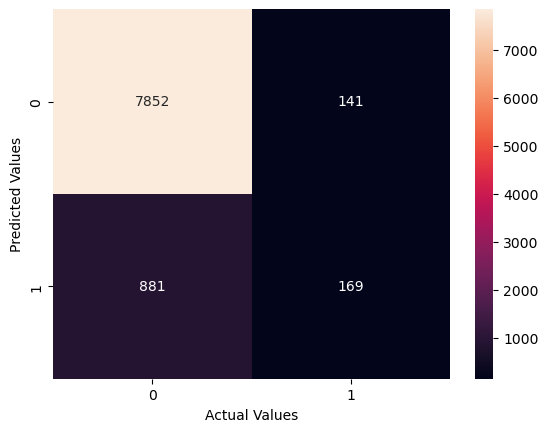

In [436]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='0.4g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [437]:
print(ytest[:25].values)
print(ypred[:25])

[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Threshold selection

In [438]:
lg.predict_proba(xtest)

array([[0.94055682, 0.05944318],
       [0.92547757, 0.07452243],
       [0.66302703, 0.33697297],
       ...,
       [0.91860576, 0.08139424],
       [0.99842442, 0.00157558],
       [0.93171722, 0.06828278]])

- here we are consern with negative class, i.e all FN should be predicted as FN. So we will select the negative class probability.

In [439]:
proba=lg.predict_proba(xtest)[:,1]
proba

array([0.05944318, 0.07452243, 0.33697297, ..., 0.08139424, 0.00157558,
       0.06828278])

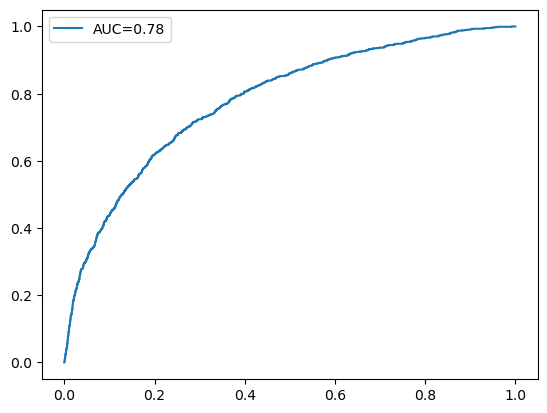

In [440]:
auc=roc_auc_score(ytest,proba)
fpr,tpr,thresholds = roc_curve(ytest,proba)
plt.plot(fpr,tpr,label='AUC=%0.2f'%auc)
plt.legend()

In [441]:
auc

0.7822298082250541

In [442]:
thresholds

array([1.99987653e+00, 9.99876528e-01, 9.96878290e-01, ...,
       4.46827004e-04, 4.38675430e-04, 3.27813412e-07])

In [443]:
len(thresholds)

1575

In [444]:
accuracy = []

for i in thresholds:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(thresholds),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [445]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
179,4.714025e-01,0.887980
172,4.864035e-01,0.887869
178,4.737626e-01,0.887758
176,4.754942e-01,0.887758
188,4.535053e-01,0.887758
...,...,...
1570,6.503746e-03,0.150171
1571,6.490987e-03,0.150061
1572,4.468270e-04,0.123632
1573,4.386754e-04,0.123521


In [446]:
from sklearn.preprocessing import binarize

In [447]:
y = binarize([proba], threshold=0.4714025)[0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [448]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.56      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [449]:
confusion_matrix(ytest,y)

array([[7840,  153],
       [ 859,  191]], dtype=int64)